# Naive Bayes

## Introdução

Esse é um método de aprendizado supervisionado usado para classificações.

A ideia por trás desse algoritmo é a assunção que quaisquer variáveis no problema não estão relacionados entre si, sendo então calculado a proporção de cada uma no dataset de treinamento que leva a determinada classe para então definir a classificação da nova tupla.

## Vantagens e desvantagens

### Vantagens
* Simples de implementar
* Rápido para predições em tempo real
* Pode ser usado para dados categóricos ou numéricos

### Desvantagens
* Assume que as variáveis de entrada são independentes entre si, o que raramente é verdade
* Quando uma categoria não é encontrada nos dados de treinamento, mas está presente nos dados de teste há problemas no cálculo da classificação.

## Base matemática

A base matemática para o algoritmo Naive Bayes é o Teorema de Bayes, mostrado na figura abaixo:

<img src='https://miro.medium.com/max/640/1*xfvAipyVBfo1RPwkL9DmYQ.webp'>

Mas para que esse teorema seja verdade, é necessário que as variáveis do nosso modelo sejam independentes entre si, o que dificilmente é verdade em problemas reais.

Mas dado que essa assunção é real, então temos:

<img src='https://miro.medium.com/max/720/1*bIZ1Jdn3k5deoeJxwNxRmA.webp'>

Cada termo P(xi|y) é calculado a partir do dataset e então a classificação é dada pela classe cujo P(y|X) tem maior módulo.



## Aplicações

* Predições em tempo real devido à rapidez dos cálculos
* Filtro de spam
* Sistema de recomendação

## Exemplo
Dataset de mensagens SMS classificadas em spam ou não

Disponível em: https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

In [17]:
import pandas as pd

df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
df.drop('Unnamed: 2', 1, inplace=True)
df.drop('Unnamed: 3', 1, inplace=True)
df.drop('Unnamed: 4', 1, inplace=True)
df.rename(columns = {'v1':'Target','v2':'Mensagem'}, inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Target,Mensagem
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Verificando a distribuição das classes

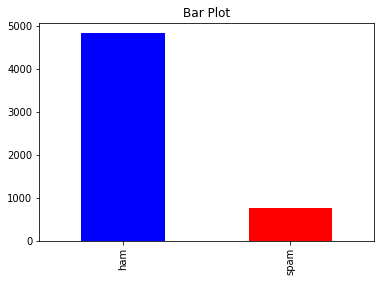

In [22]:
import matplotlib.pyplot as plt

contagem = pd.value_counts(df['Target'], sort= True)
contagem.plot(kind ='bar', color=["blue","red"])
plt.title('Bar Plot')
plt.show();

Implementando o Naive Bayes

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

X = df['Mensagem']
Y = df['Target']

x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, test_size=0.3, random_state=0)

pipeline = Pipeline(steps=[('vectorize', CountVectorizer(ngram_range=(1, 1), token_pattern=r'\b\w+\b')),
                       ('classifier', MultinomialNB())])

pipeline.fit(x_treino, y_treino)

predicao = pipeline.predict(x_teste)

Verificando os resultados

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1434
        spam       0.98      0.93      0.95       238

    accuracy                           0.99      1672
   macro avg       0.99      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



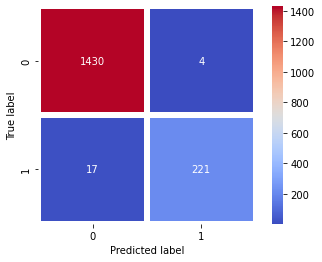

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print(classification_report(y_teste, predicao))

matriz_confusao = confusion_matrix(y_teste, predicao)
sns.heatmap(matriz_confusao, square=True, annot=True, fmt='d', cbar=True, cmap='coolwarm', linewidths=5)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Fontes bibliográficas

[1] 1.9. Naive Bayes. Sci-kit learn. Disponível em: https://scikit-learn.org/stable/modules/naive_bayes.html

[2] Naïve Bayes Algorithm. Medium. Disponível em: https://medium.com/analytics-vidhya/na%C3%AFve-bayes-algorithm-5bf31e9032a2